In [1]:
import pandas as pd
import numpy as np

In [2]:
math_dataset = pd.read_csv('data/Maths.csv')
portuguese_dataset = pd.read_csv('data/Portuguese.csv')


In [3]:
math_dataset.head(15)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10
5,GP,M,16,U,LE3,T,4,3,services,other,...,5,4,2,1,2,5,10,15,15,15
6,GP,M,16,U,LE3,T,2,2,other,other,...,4,4,4,1,1,3,0,12,12,11
7,GP,F,17,U,GT3,A,4,4,other,teacher,...,4,1,4,1,1,1,6,6,5,6
8,GP,M,15,U,LE3,A,3,2,services,other,...,4,2,2,1,1,1,0,16,18,19
9,GP,M,15,U,GT3,T,3,4,other,other,...,5,5,1,1,1,5,0,14,15,15


In [4]:
portuguese_dataset.head(15)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13
5,GP,M,16,U,LE3,T,4,3,services,other,...,5,4,2,1,2,5,6,12,12,13
6,GP,M,16,U,LE3,T,2,2,other,other,...,4,4,4,1,1,3,0,13,12,13
7,GP,F,17,U,GT3,A,4,4,other,teacher,...,4,1,4,1,1,1,2,10,13,13
8,GP,M,15,U,LE3,A,3,2,services,other,...,4,2,2,1,1,1,0,15,16,17
9,GP,M,15,U,GT3,T,3,4,other,other,...,5,5,1,1,1,5,0,12,12,13


In [5]:
X_train_full = portuguese_dataset.copy()
y = X_train_full.G3
X_train_full.drop(columns=['G1', 'G2', 'G3'],axis=1, inplace=True)
X_test_full = math_dataset.copy()

In [6]:
alcohol_features = ['age', 'studytime', 'reason', 'failures', 'famsup', 'paid', 'activities', 'higher', 'internet', 'romantic', 'famrel', 
                    'freetime', 'goout', 'Dalc', 'Walc', 'absences']

X_train_full = X_train_full[alcohol_features]
X_test_full = X_test_full[alcohol_features]

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y, train_size=0.8, test_size=0.2)

In [8]:
X_train.head()

,age,studytime,reason,failures,famsup,paid,activities,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,absences
78,17,1,home,3,yes,no,yes,no,yes,no,4,5,1,1,1,0
256,18,1,course,1,yes,no,yes,no,yes,yes,4,4,3,2,2,26
392,17,2,home,0,yes,no,no,yes,yes,yes,4,3,2,2,3,0
362,18,2,course,0,yes,no,no,yes,yes,no,4,4,4,3,3,0
25,16,1,home,0,yes,no,no,yes,yes,no,1,2,2,1,3,6


In [9]:
X_train.columns

Index(['age', 'studytime', 'reason', 'failures', 'famsup', 'paid',
       'activities', 'higher', 'internet', 'romantic', 'famrel', 'freetime',
       'goout', 'Dalc', 'Walc', 'absences'],
      dtype='object')

In [10]:
X_train_full

,age,studytime,reason,failures,famsup,paid,activities,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,absences
0,18,2,course,0,no,no,no,yes,no,no,4,3,4,1,1,4
1,17,2,course,0,yes,no,no,yes,yes,no,5,3,3,1,1,2
2,15,2,other,0,no,no,no,yes,yes,no,4,3,2,2,3,6
3,15,3,home,0,yes,no,yes,yes,yes,yes,3,2,2,1,1,0
4,16,2,home,0,yes,no,no,yes,no,no,4,3,2,1,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,19,3,course,1,no,no,yes,yes,yes,no,5,4,2,1,2,4
645,18,2,course,0,yes,no,no,yes,yes,no,4,3,4,1,1,4
646,18,2,course,0,no,no,yes,yes,no,no,1,1,1,1,1,6
647,17,1,course,0,no,no,no,yes,yes,no,2,4,5,3,4,6


In [11]:
import missingno as msno

<Axes: >

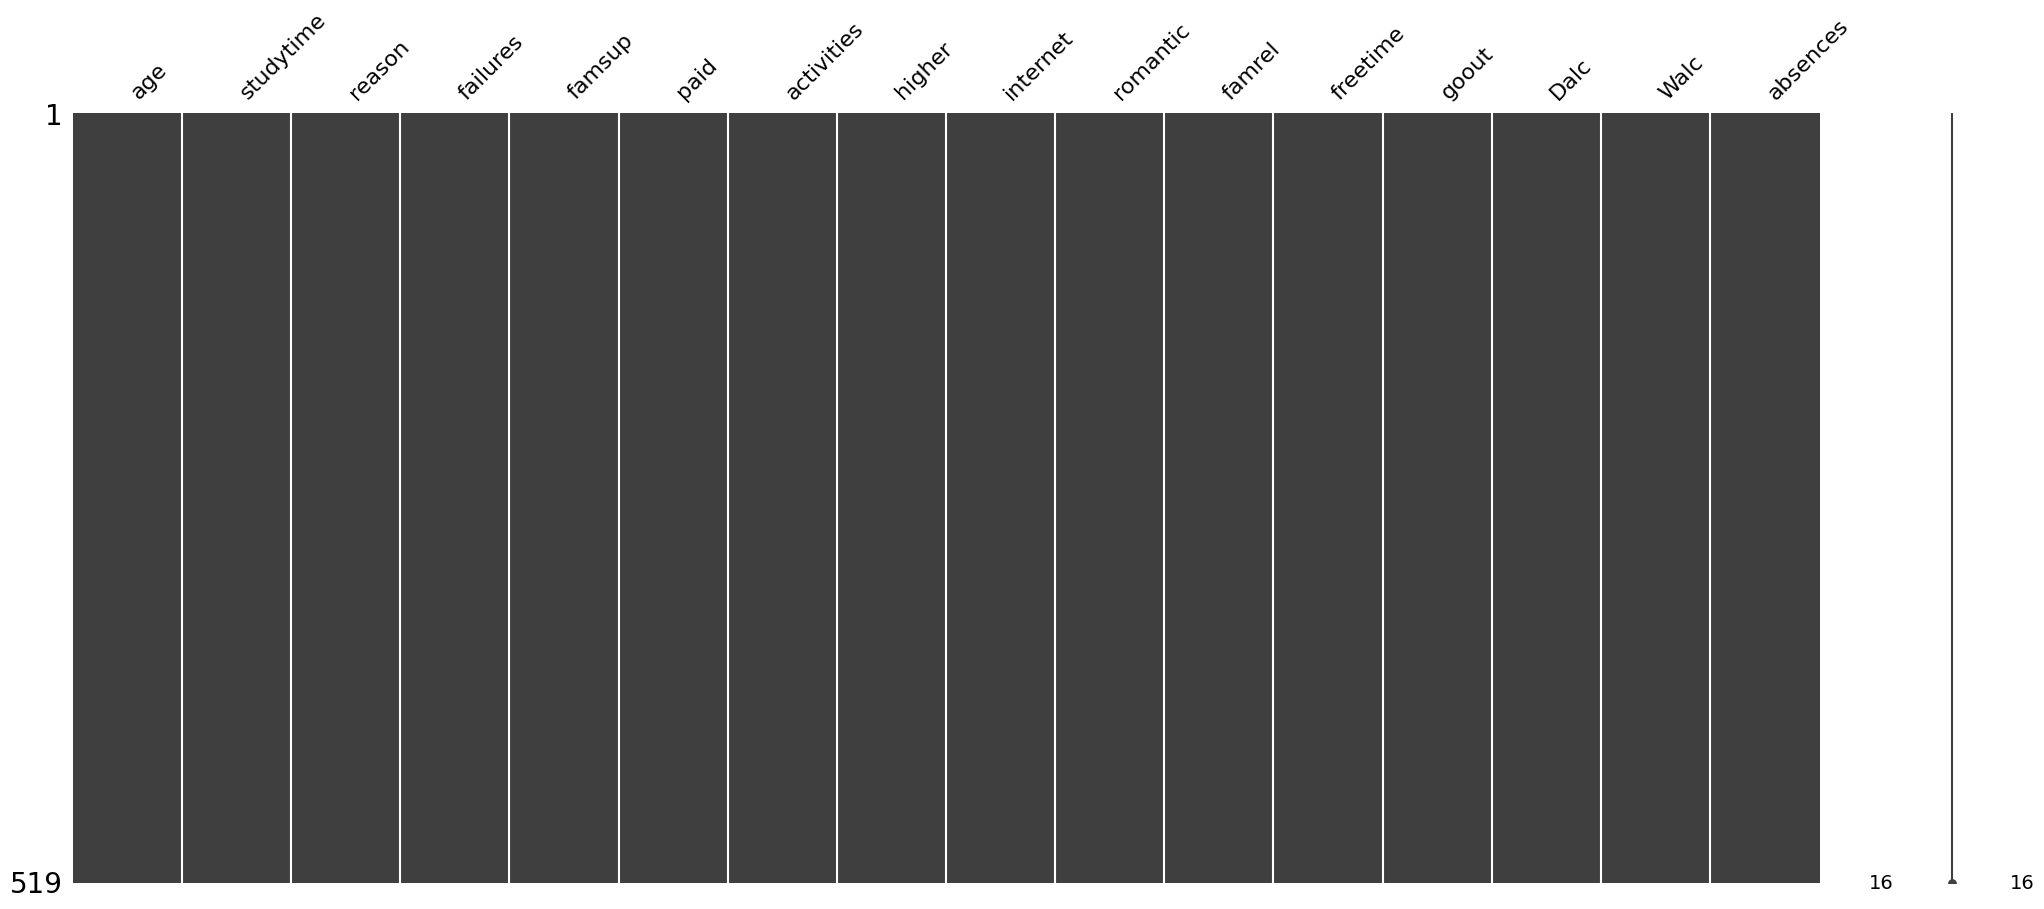

In [12]:
msno.matrix(X_train)

In [13]:
X_train.dtypes

age            int64
studytime      int64
reason        object
failures       int64
famsup        object
paid          object
activities    object
higher        object
internet      object
romantic      object
famrel         int64
freetime       int64
goout          int64
Dalc           int64
Walc           int64
absences       int64
dtype: object

In [14]:
from sklearn.preprocessing import OrdinalEncoder

bool_cols = ['famsup', 'paid', 'activities', 'higher', 'internet', 'romantic']
label_X_train = X_train.copy()
label_X_valid = X_valid.copy()

encoder = OrdinalEncoder()

label_X_train[bool_cols] = encoder.fit_transform(label_X_train[bool_cols])
label_X_valid[bool_cols] = encoder.transform(label_X_valid[bool_cols])
label_X_train

,age,studytime,reason,failures,famsup,paid,activities,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,absences
78,17,1,home,3,1.0,0.0,1.0,0.0,1.0,0.0,4,5,1,1,1,0
256,18,1,course,1,1.0,0.0,1.0,0.0,1.0,1.0,4,4,3,2,2,26
392,17,2,home,0,1.0,0.0,0.0,1.0,1.0,1.0,4,3,2,2,3,0
362,18,2,course,0,1.0,0.0,0.0,1.0,1.0,0.0,4,4,4,3,3,0
25,16,1,home,0,1.0,0.0,0.0,1.0,1.0,0.0,1,2,2,1,3,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
630,18,3,reputation,0,0.0,0.0,0.0,1.0,1.0,0.0,5,4,4,1,1,0
492,16,2,course,0,0.0,0.0,0.0,1.0,0.0,1.0,3,3,2,1,1,2
357,18,3,course,0,1.0,0.0,1.0,1.0,1.0,1.0,4,3,4,1,1,2
483,16,2,course,0,1.0,0.0,0.0,0.0,1.0,0.0,3,4,5,1,2,1


In [15]:
X_train = label_X_train.copy()
X_valid = label_X_valid.copy()

In [16]:
from sklearn.preprocessing import OneHotEncoder

OH_cols = ['reason']

OH_encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)
OH_cols_train = pd.DataFrame(OH_encoder.fit_transform(X_train[OH_cols]))
OH_cols_valid = pd.DataFrame(OH_encoder.transform(X_valid[OH_cols]))

OH_cols_train.index = X_train.index
OH_cols_valid.index = X_valid.index

num_X_train = X_train.drop(OH_cols, axis=1)
num_X_valid = X_valid.drop(OH_cols, axis=1)

OH_X_train = pd.concat([num_X_train, OH_cols_train], axis=1)
OH_X_valid = pd.concat([num_X_valid, OH_cols_valid], axis=1)

OH_X_train.columns = OH_X_train.columns.astype(str)
OH_X_valid.columns = OH_X_valid.columns.astype(str)

OH_X_train
                          

C:\Users\jjero\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,age,studytime,failures,famsup,paid,activities,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,absences,0,1,2,3
78,17,1,3,1.0,0.0,1.0,0.0,1.0,0.0,4,5,1,1,1,0,0.0,1.0,0.0,0.0
256,18,1,1,1.0,0.0,1.0,0.0,1.0,1.0,4,4,3,2,2,26,1.0,0.0,0.0,0.0
392,17,2,0,1.0,0.0,0.0,1.0,1.0,1.0,4,3,2,2,3,0,0.0,1.0,0.0,0.0
362,18,2,0,1.0,0.0,0.0,1.0,1.0,0.0,4,4,4,3,3,0,1.0,0.0,0.0,0.0
25,16,1,0,1.0,0.0,0.0,1.0,1.0,0.0,1,2,2,1,3,6,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
630,18,3,0,0.0,0.0,0.0,1.0,1.0,0.0,5,4,4,1,1,0,0.0,0.0,0.0,1.0
492,16,2,0,0.0,0.0,0.0,1.0,0.0,1.0,3,3,2,1,1,2,1.0,0.0,0.0,0.0
357,18,3,0,1.0,0.0,1.0,1.0,1.0,1.0,4,3,4,1,1,2,1.0,0.0,0.0,0.0
483,16,2,0,1.0,0.0,0.0,0.0,1.0,0.0,3,4,5,1,2,1,1.0,0.0,0.0,0.0


In [17]:
X_train = OH_X_train.copy()
X_valid = OH_X_valid.copy()

In [18]:
X_train

,age,studytime,failures,famsup,paid,activities,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,absences,0,1,2,3
78,17,1,3,1.0,0.0,1.0,0.0,1.0,0.0,4,5,1,1,1,0,0.0,1.0,0.0,0.0
256,18,1,1,1.0,0.0,1.0,0.0,1.0,1.0,4,4,3,2,2,26,1.0,0.0,0.0,0.0
392,17,2,0,1.0,0.0,0.0,1.0,1.0,1.0,4,3,2,2,3,0,0.0,1.0,0.0,0.0
362,18,2,0,1.0,0.0,0.0,1.0,1.0,0.0,4,4,4,3,3,0,1.0,0.0,0.0,0.0
25,16,1,0,1.0,0.0,0.0,1.0,1.0,0.0,1,2,2,1,3,6,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
630,18,3,0,0.0,0.0,0.0,1.0,1.0,0.0,5,4,4,1,1,0,0.0,0.0,0.0,1.0
492,16,2,0,0.0,0.0,0.0,1.0,0.0,1.0,3,3,2,1,1,2,1.0,0.0,0.0,0.0
357,18,3,0,1.0,0.0,1.0,1.0,1.0,1.0,4,3,4,1,1,2,1.0,0.0,0.0,0.0
483,16,2,0,1.0,0.0,0.0,0.0,1.0,0.0,3,4,5,1,2,1,1.0,0.0,0.0,0.0


In [25]:
from linear.linear_regression import LinearRegression

our_linear_regression = LinearRegression(n_estimators=100, learning_rate=0.01)
m,b = our_linear_regression.fit(X_train, y_train, 14)

result = our_linear_regression.predict(X_valid)

In [26]:
result

129    11.665531
319    11.589228
564    11.741834
144    11.512925
476    11.741834
         ...    
229    11.741834
636    11.665531
572    11.512925
181    11.818137
172    11.818137
Length: 130, dtype: float64

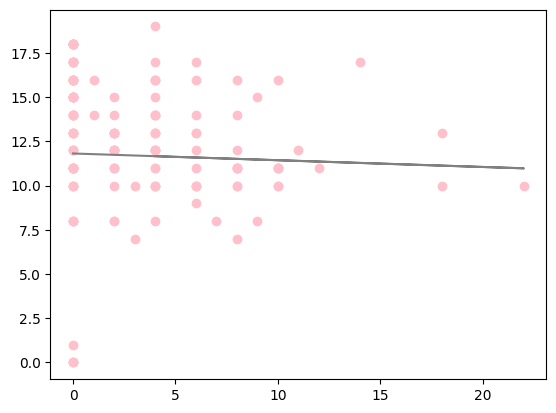

In [27]:
import matplotlib.pyplot as plt
plt.scatter(X_valid.absences, y_valid, color='pink')
plt.plot(X_valid.absences.to_numpy(), result.values, color='gray')
plt.show()

In [28]:
from sklearn.metrics import mean_absolute_error
print("Out linear model mean absolute error: " + str(mean_absolute_error(y_valid, result)))

Out linear model mean absolute error: 2.7194879526596454


In [29]:
#sklearn LinearRegression
from sklearn.linear_model import LinearRegression as SklearnLinearRegression

sklearn_line_regression = SklearnLinearRegression()
sklearn_line_regression.fit(pd.DataFrame(X_train['absences']), y_train)
sklearn_results = sklearn_line_regression.predict(pd.DataFrame(X_valid['absences']))

print("Sklearn linear model mean absolute error: " + str(mean_absolute_error(y_valid, sklearn_results)))

Sklearn linear model mean absolute error: 2.6851254493984733


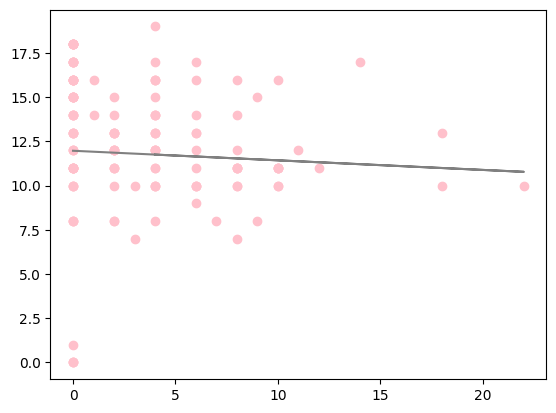

In [30]:
import matplotlib.pyplot as plt
plt.scatter(X_valid.absences, y_valid, color='pink')
plt.plot(X_valid.absences.to_numpy(), sklearn_results, color='gray')
plt.show()